In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

## Mapping Inequality 

#### 1.Loading the geojson file. CRS(4326)
#### 2.Checking the basic info, shape, columns, etc. Each row is an area id, with city, associated polygon, landuse as its features. It has the historialcal redlining grade of ABCD, meaning Best, still Desirable, Definitely Declining. 
#### 3.EDA

Some Questions:
1. What are the different grades assigned, and how many polygons fall uder each?
3. Where do the different grades cluster within city
4. What is the approximate area of each polygon, and how does it vary by grade?


In [6]:
gdf = gpd.read_file("mappinginequality.json")
print()

In [7]:
#checking basic info
print(gdf.info())
print(gdf.shape)
print(gdf.crs)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10154 entries, 0 to 10153
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   area_id      10154 non-null  int32   
 1   city         10154 non-null  object  
 2   state        10154 non-null  object  
 3   city_survey  10154 non-null  bool    
 4   category     10154 non-null  object  
 5   grade        9679 non-null   object  
 6   label        10154 non-null  object  
 7   residential  10154 non-null  bool    
 8   commercial   10154 non-null  bool    
 9   industrial   10154 non-null  bool    
 10  fill         10154 non-null  object  
 11  geometry     10154 non-null  geometry
dtypes: bool(4), geometry(1), int32(1), object(6)
memory usage: 634.8+ KB
None
(10154, 12)
EPSG:4326


In [8]:
#it has redlines for all the major cities across the U.S. 
print(gdf["city"].value_counts())

city
Chicago        703
Los Angeles    417
Detroit        239
Cleveland      192
Queens         169
              ... 
Carthage         3
Mitchell         3
Monmouth         2
Minot            2
Enid             1
Name: count, Length: 300, dtype: int64


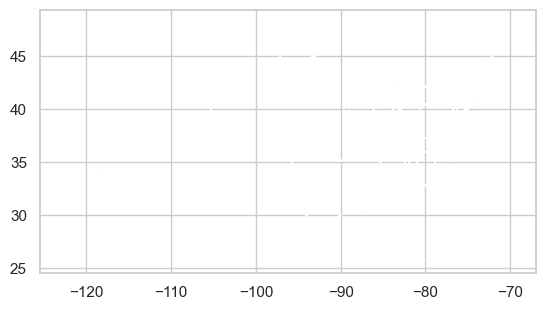

In [9]:
#very rough projection of the polygons 
gdf.plot()
plt.show()

In [40]:
# Assume we only want Boston data here
gdf_boston = gdf[gdf["city"]=="Boston"]
print(gdf_boston.shape)
gdf_boston

(41, 12)


,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill,geometry
3644,9543,Boston,MA,True,Best,A,A1,True,False,False,#76a865,"MULTIPOLYGON (((-71.11985 42.32301, -71.12156 ..."
3645,5015,Boston,MA,True,Still Desirable,B,B1,True,False,False,#7cb5bd,"MULTIPOLYGON (((-71.17193 42.34689, -71.16944 ..."
3646,9545,Boston,MA,True,Still Desirable,B,B2,True,False,False,#7cb5bd,"MULTIPOLYGON (((-71.15731 42.33977, -71.15613 ..."
3647,4949,Boston,MA,True,Still Desirable,B,B3,True,False,False,#7cb5bd,"MULTIPOLYGON (((-71.06598 42.35771, -71.06609 ..."
3648,4946,Boston,MA,True,Still Desirable,B,B4,True,False,False,#7cb5bd,"MULTIPOLYGON (((-71.11527 42.30196, -71.11521 ..."
3649,4943,Boston,MA,True,Still Desirable,B,B5,True,False,False,#7cb5bd,"MULTIPOLYGON (((-71.15272 42.29483, -71.15678 ..."
3650,5027,Boston,MA,True,Still Desirable,B,B6,True,False,False,#7cb5bd,"MULTIPOLYGON (((-71.1128 42.28883, -71.11124 4..."
3651,4928,Boston,MA,True,Still Desirable,B,B7,True,False,False,#7cb5bd,"MULTIPOLYGON (((-71.11124 42.26905, -71.11042 ..."
3652,5650,Boston,MA,True,Still Desirable,B,B8,True,False,False,#7cb5bd,"MULTIPOLYGON (((-71.08044 42.27906, -71.08049 ..."
3653,4985,Boston,MA,True,Definitely Declining,C,C1,True,False,False,#ffff00,"MULTIPOLYGON (((-71.12163 42.35152, -71.12089 ..."


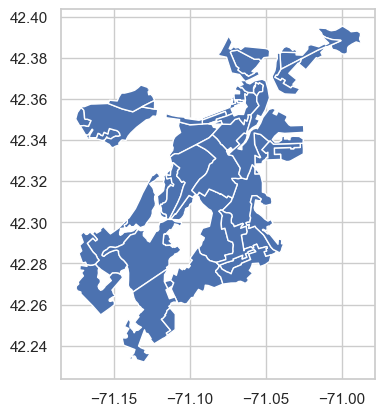

In [11]:
gdf_boston.plot()
plt.show()

1. What are the different grades assigned, and how many polygons fall uder each?

In [13]:
# change the projection to 3857 so distance is meaningful 
gdf_boston = gdf_boston.to_crs(epsg=3857)

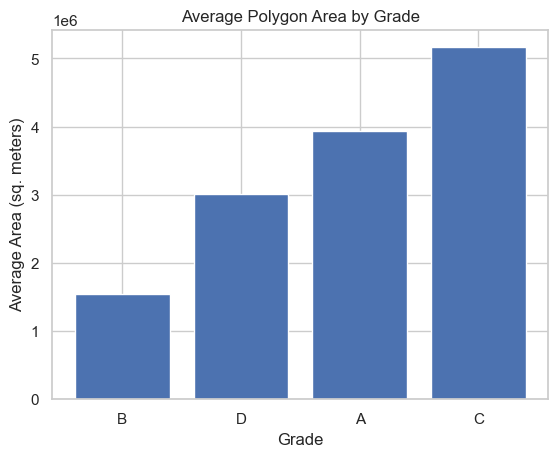

In [15]:
gdf_boston["area"] = gdf_boston.geometry.area

# 4. Group by grade and compute the average area
mean_area_by_grade = gdf_boston.groupby("grade")["area"].mean().sort_values()


# 5. Create a bar chart
plt.bar(mean_area_by_grade.index, mean_area_by_grade.values)
plt.xlabel("Grade")
plt.ylabel("Average Area (sq. meters)")
plt.title("Average Polygon Area by Grade")
plt.show()

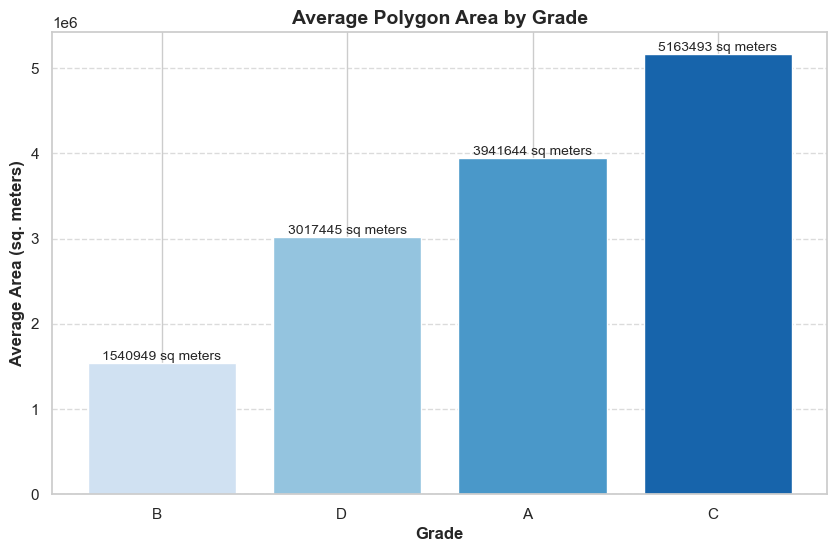

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 风格
sns.set_theme(style="whitegrid")

# 画布大小
plt.figure(figsize=(10, 6))

# 颜色渐变
colors = sns.color_palette("Blues", len(mean_area_by_grade))

# 绘制条形图
bars = plt.bar(mean_area_by_grade.index, mean_area_by_grade.values, color=colors)

# 添加数值标签
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.0f} sq meters", ha='center', va='bottom', fontsize=10)

# 设置轴标签和标题
plt.xlabel("Grade", fontsize=12, fontweight='bold')
plt.ylabel("Average Area (sq. meters)", fontsize=12, fontweight='bold')
plt.title("Average Polygon Area by Grade", fontsize=14, fontweight='bold')

# 旋转 x 轴标签，防止重叠
plt.xticks( ha='right')

# 添加网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图形
plt.show()


How do those historically redlined areas correlate with current socioeconomic indicators or property values in Boston?
Do Boston neighborhoods show a similar pattern of adjacency where “A” and “D” areas are divided or do they cluster

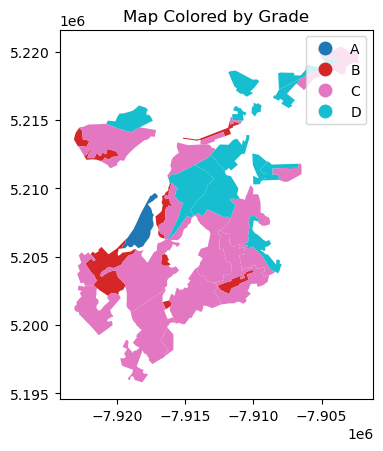

In [51]:
#  Plot by grade
gdf_boston.plot(column="grade", legend=True, categorical=True)
plt.title("Map Colored by Grade")
plt.show()


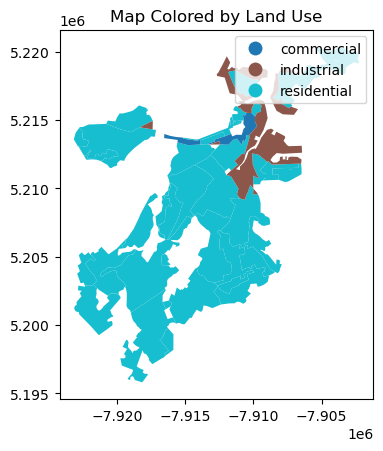

In [61]:
def get_landuse_type(row):
    if row["residential"]:
        return "residential"
    elif row["commercial"]:
        return "commercial"
    elif row["industrial"]:
        return "industrial"
    else:
        return "other" 

gdf_boston["landuse_cat"] = gdf.apply(get_landuse_type, axis=1)

# Now plot the map, coloring by landuse_cat
gdf_boston.plot(column="landuse_cat", legend=True, categorical=True)
plt.title("Map Colored by Land Use")
plt.show()


In [46]:
gdf_boston_4326 = gdf_boston.to_crs(epsg=4326)


# 2. Create a color dictionary for the 'grade' column
color_dict = {
    "A": "#76a865",
    "B": "#7cb5bd",
    "C": "#ffff00",
    "D": "#ff0000"
}

# 3. Define a style function
def style_function(feature):
    grade_value = feature["properties"].get("grade", "None")
    fill_color = color_dict.get(grade_value, "#888888")
    return {
        
        "color": fill_color,        
        "weight": 1,            # Boundary thickness
        "fillColor": fill_color,  
        "fillOpacity": 0.3,     
    }


# Initialize Folium map around Boston with a simpler tile
m = folium.Map(
    location=[42.36, -71.05], 
    zoom_start=12,
    tiles="CartoDB positron"   
)

folium.GeoJson(
    data=gdf_boston_4326.to_json(),
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=["grade"],  
        aliases=["Grade: "],
        localize=True
    )
).add_to(m)


m
